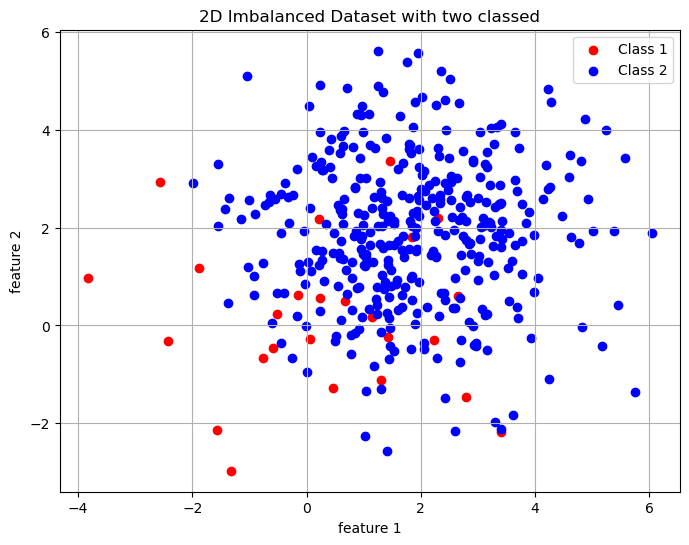

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import xgboost as xgb
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

np.random.seed(42)

n_samples_1 = 25
n_samples_2 = 375
centers = [(0,0),(2,2)]
cluster_std = [1.5,1.5]

X,y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                 centers = centers,
                 cluster_std=cluster_std,
                 random_state=0)

plt.figure(figsize=(8,6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', label='Class 1')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with two classed')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


classification report : 
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.96      1.00      0.98       113

    accuracy                           0.96       120
   macro avg       0.98      0.64      0.71       120
weighted avg       0.96      0.96      0.95       120

roc auc score : 0.9557522123893806


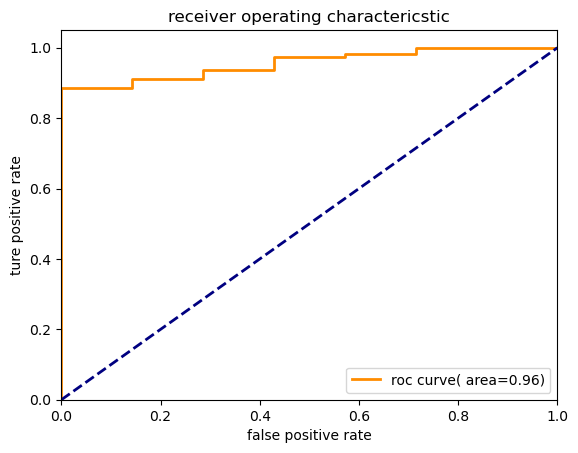

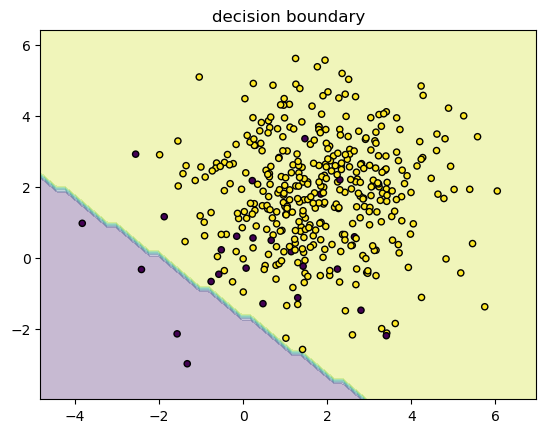

In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:,1]

print("classification report : ")
print(classification_report(y_test, y_pred))

print("roc auc score :", roc_auc_score(y_test, y_proba))

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label ='roc curve( area=%0.2f)' %roc_auc_score(y_test,y_proba))
plt.plot([0,1],[0,1], color='navy', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('ture positive rate')
plt.title('receiver operating charactericstic')
plt.legend(loc="lower right")
plt.show()


def plot_decision_boundaries(X,y, model):
    plot_step = 0.2
    x_min, x_max = X[:,0].min() -1,X[:,0].max()+1
    y_min, y_max = X[:,1].min() -1,X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max, plot_step),np.arange(y_min,y_max,plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=20)
    plt.title("decision boundary")
    plt.show()

plot_decision_boundaries(X,y, classifier)
    

Random Undersampling

In [9]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


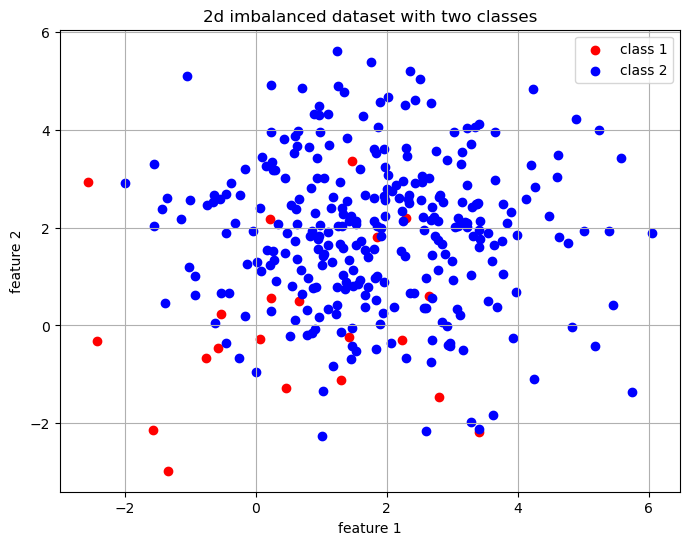

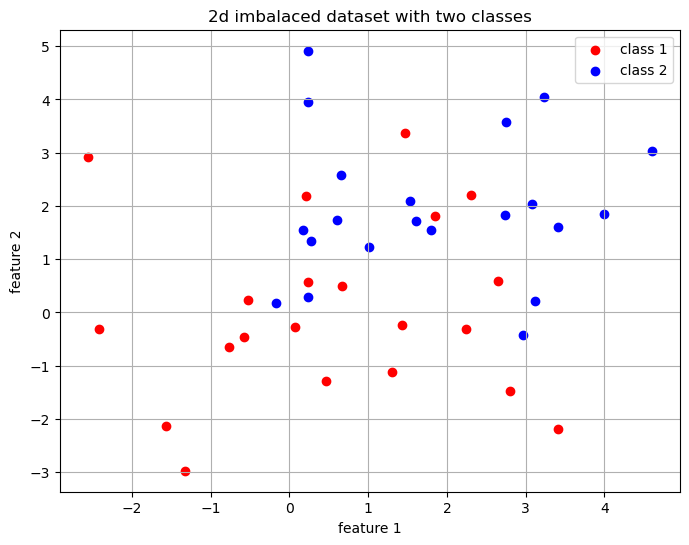

In [10]:
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

plt.figure(figsize=(8,6))
plt.scatter(X_train[y_train == 0] [:,0], X_train[y_train ==0][:,1],color='red', label='class 1')
plt.scatter(X_train[y_train ==1] [:,0], X_train[y_train ==1][:,1], color='blue', label='class 2')
plt.title('2d imbalanced dataset with two classes')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(X_resampled[y_resampled == 0][:,0], X_resampled[y_resampled == 0][:,1], color='red', label='class 1')
plt.scatter(X_resampled[y_resampled == 1][:,0], X_resampled[y_resampled == 1][:,1], color='blue',label='class 2')
plt.title('2d imbalaced dataset with two classes')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
X_train.shape

(320, 2)

In [12]:
X_resampled.shape

(42, 2)

In [13]:
import pandas as pd
pd.Series(y_train).value_counts()

1    299
0     21
Name: count, dtype: int64

In [14]:
pd.Series(y_resampled).value_counts()

0    21
1    21
Name: count, dtype: int64

classification report (with over sampling) :
              precision    recall  f1-score   support

           0       0.18      1.00      0.31         4
           1       1.00      0.76      0.87        76

    accuracy                           0.78        80
   macro avg       0.59      0.88      0.59        80
weighted avg       0.96      0.78      0.84        80

ros auc score (with over sampling): 0.9375


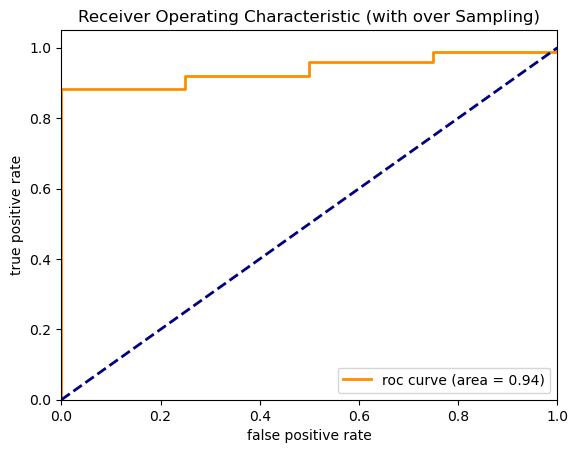

C:\Users\shiva\AppData\Local\Temp\ipykernel_1820\2706288849.py:33: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(xx, yy, Z, aplha=0.3)
C:\Users\shiva\AppData\Local\Temp\ipykernel_1820\2706288849.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


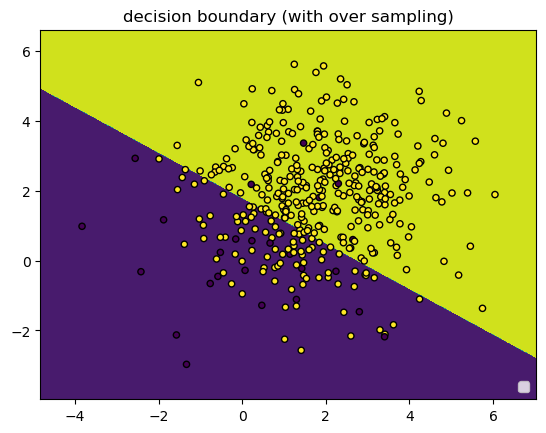

In [15]:
from sklearn.linear_model import LogisticRegression

classifier_rus = LogisticRegression()
classifier_rus.fit(X_resampled, y_resampled)

y_pred_rus= classifier_rus.predict(X_test)
y_proba_rus = classifier_rus.predict_proba(X_test)[:,1]

print("classification report (with over sampling) :")
print(classification_report(y_test, y_pred_rus))

print("ros auc score (with over sampling):", roc_auc_score(y_test, y_proba_rus))

fpr_rus, tpr_rus, _= roc_curve(y_test, y_proba_rus)
plt.figure()
plt.plot(fpr_rus, tpr_rus, color='darkorange', lw=2,label='roc curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_rus))
plt.plot([0,1],[0,1], color = 'navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operating Characteristic (with over Sampling)')
plt.legend(loc="lower right")
plt.show()

def plot_decision_boundaries_ros(X,y,model):
    plot_step=0.02
    x_min,x_max = X[:,0].min() -1, X[:,0].max()+1
    y_min,y_max = X[:,1].min() -1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, aplha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=20)
    plt.title("decision boundary (with over sampling)")
    plt.legend(loc="lower right")
    plt.show()

plot_decision_boundaries_ros(X,y,classifier_rus)

Random Oversampling

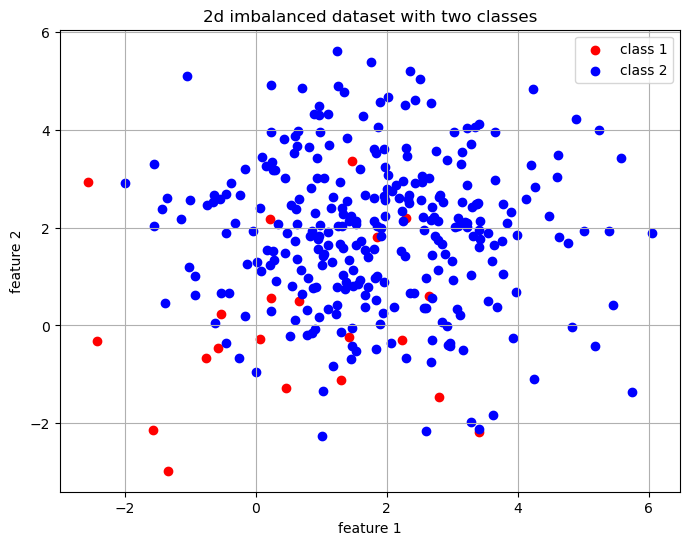

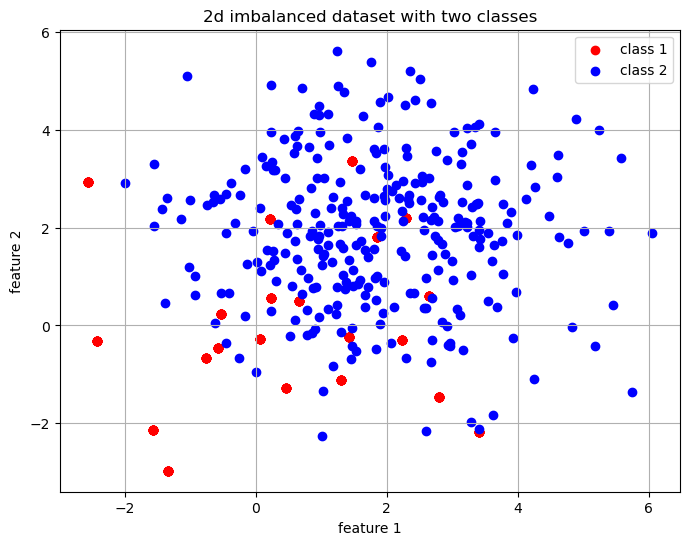

In [16]:
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

plt.figure(figsize=(8,6))
plt.scatter(X_train[y_train ==0][:,0], X_train[y_train == 0][:,1],color='red', label='class 1')
plt.scatter(X_train[y_train ==1][:,0], X_train[y_train == 1][:,1], color='blue', label='class 2')
plt.title('2d imbalanced dataset with two classes')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(X_resampled[y_resampled == 0][:,0], X_resampled[y_resampled == 0][:,1], color='red', label='class 1')
plt.scatter(X_resampled[y_resampled == 1][:,0], X_resampled[y_resampled == 1][:,1], color='blue',label='class 2')
plt.title('2d imbalanced dataset with two classes')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
X_train.shape

(320, 2)

In [18]:
X_resampled.shape

(598, 2)

In [19]:
pd.Series(y_train).value_counts()

1    299
0     21
Name: count, dtype: int64

In [20]:
pd.Series(y_resampled).value_counts()

1    299
0    299
Name: count, dtype: int64

In [21]:
from sklearn.linear_model import LogisticRegression

classificaton report (with over sampling) :
              precision    recall  f1-score   support

           0       0.18      1.00      0.31         4
           1       1.00      0.76      0.87        76

    accuracy                           0.78        80
   macro avg       0.59      0.88      0.59        80
weighted avg       0.96      0.78      0.84        80

ros auc score (with over sampling): 0.950657894736842


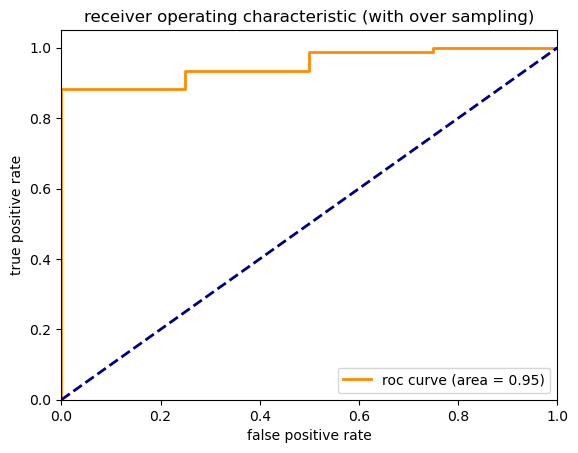

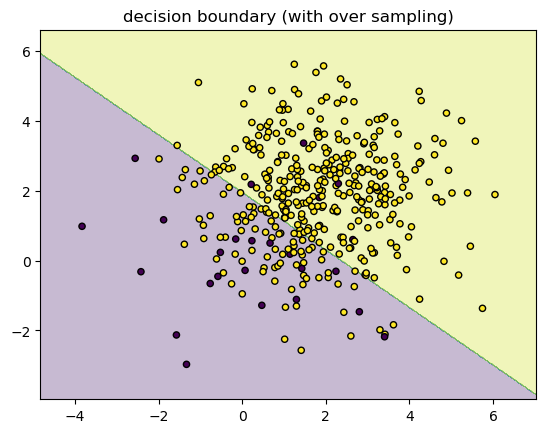

In [29]:
# Initialize and train RandomForest classifier on resampled data

classifier_ros = LogisticRegression()
classifier_ros.fit(X_resampled, y_resampled)
# Predict test set
y_pred_ros = classifier_ros.predict(X_test)
y_proba_ros = classifier_ros.predict_proba(X_test)[:,1]
# Print classification report for resampled data
print("classificaton report (with over sampling) :")
print(classification_report(y_test, y_pred_ros))
# Print ROC AUC Score for resampled data
print("ros auc score (with over sampling):", roc_auc_score(y_test, y_proba_ros))
# Plotting ROC AUC Curve for resampled data
fpr_ros, tpr_ros, _= roc_curve(y_test, y_proba_ros)
plt.figure()
plt.plot(fpr_ros, tpr_ros, color='darkorange', lw=2, label='roc curve (area = %0.2f)' %roc_auc_score(y_test, y_proba_ros))
plt.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characteristic (with over sampling)')
plt.legend(loc="lower right")
plt.show()

 #Function to plot decision boundaries for resampled data
def plot_decision_boundaries_ros(X,y, model):
    plot_step = 0.02
    x_min, x_max = X[:,0].min() -1, X[:,0].max()+1
    y_min, y_max = X[:,1].min() -1, X[:,1].max()+1
    xx,yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=20)
    plt.title("decision boundary (with over sampling)")
    plt.show()

    # Plot decision boundary for resampled data
plot_decision_boundaries_ros(X,y, classifier_ros)

SMOTE

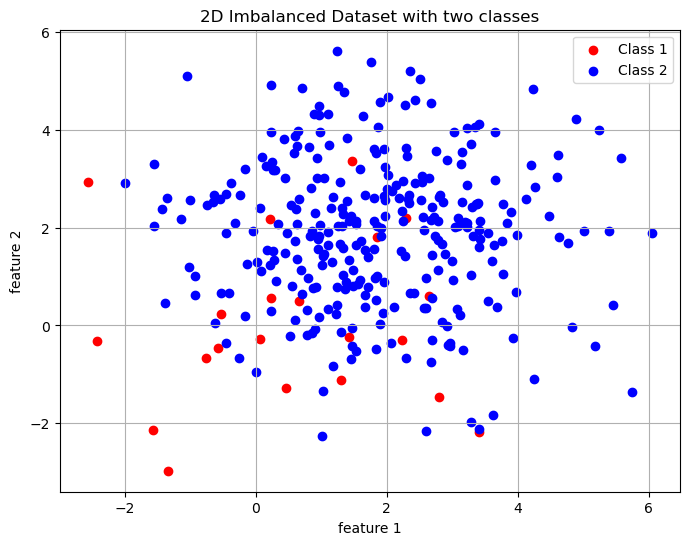

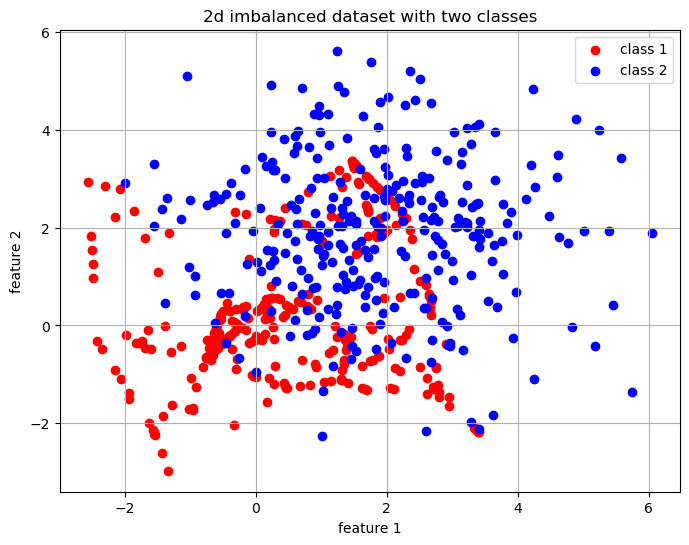

In [33]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state = 42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(8,6))
plt.scatter(X_train[y_train == 0][:,0], X_train[y_train == 0][:,1],color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train ==1][:,1] ,color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with two classes')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(X_resampled_smote[y_resampled_smote == 0][:,0], X_resampled_smote[y_resampled_smote ==0][:,1], color='red', label='class 1')
plt.scatter(X_resampled_smote[y_resampled_smote == 1][:,0], X_resampled_smote[y_resampled_smote == 1][:,1], color='blue', label='class 2')
plt.title('2d imbalanced dataset with two classes')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
X_train.shape

(320, 2)

In [35]:
X_resampled_smote.shape

(598, 2)

In [36]:
pd.Series(y_train).value_counts()

1    299
0     21
Name: count, dtype: int64

In [37]:
pd.Series(y_resampled_smote).value_counts()

1    299
0    299
Name: count, dtype: int64

Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       0.17      1.00      0.30         4
           1       1.00      0.75      0.86        76

    accuracy                           0.76        80
   macro avg       0.59      0.88      0.58        80
weighted avg       0.96      0.76      0.83        80

ROC AUC Score (With SMOTE): 0.950657894736842


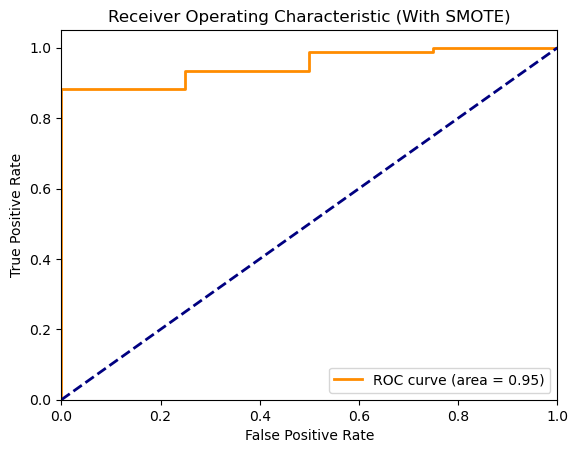

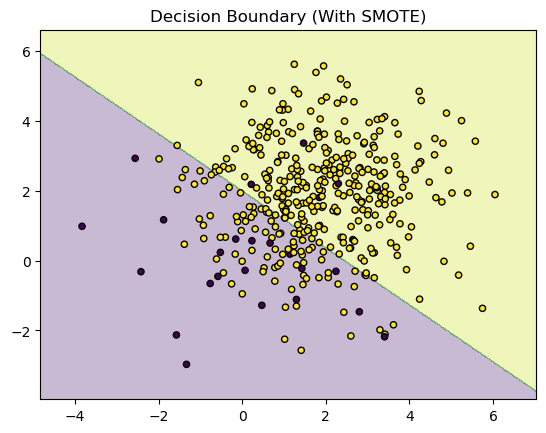

In [38]:
# Initialize and train RandomForest classifier on resampled data
classifier_smote = LogisticRegression()
classifier_smote.fit(X_resampled_smote, y_resampled_smote)

# Predict test set
y_pred_smote = classifier_smote.predict(X_test)
y_proba_smote = classifier_smote.predict_proba(X_test)[:, 1]

# Print classification report for SMOTE data
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_pred_smote))

# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (With SMOTE):", roc_auc_score(y_test, y_proba_smote))

# Plotting ROC AUC Curve for SMOTE data
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)
plt.figure()
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_smote))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With SMOTE)')
plt.legend(loc="lower right")
plt.show()

# Function to plot decision boundaries for SMOTE data
def plot_decision_boundaries_smote(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (With SMOTE)")
    plt.show()

# Plot decision boundary for SMOTE data
plot_decision_boundaries_smote(X, y, classifier_smote)

Balanced Random Forest 

Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       0.13      0.50      0.21         4
           1       0.97      0.83      0.89        76

    accuracy                           0.81        80
   macro avg       0.55      0.66      0.55        80
weighted avg       0.93      0.81      0.86        80

ROC AUC Score (With SMOTE): 0.8273026315789473


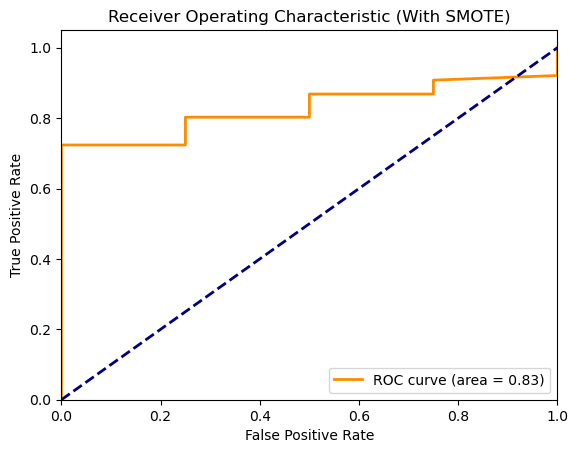

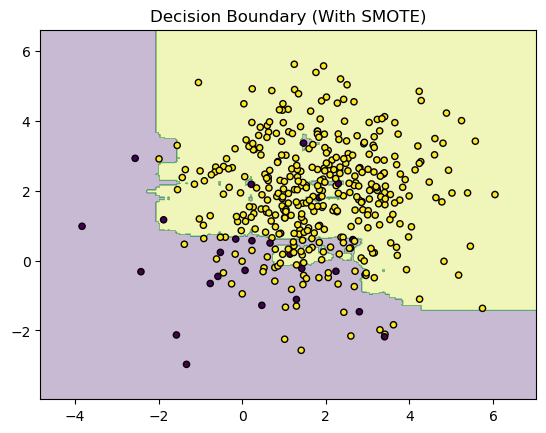

In [41]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
classifier = BalancedRandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict test set
y_pred_brf = classifier.predict(X_test)
y_proba_brf = classifier.predict_proba(X_test)[:, 1]

# Print classification report for SMOTE data
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_pred_brf))

# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (With SMOTE):", roc_auc_score(y_test, y_proba_brf))

# Plotting ROC AUC Curve for SMOTE data
fpr_brf, tpr_brf, _ = roc_curve(y_test, y_proba_brf)
plt.figure()
plt.plot(fpr_brf, tpr_brf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_brf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With SMOTE)')
plt.legend(loc="lower right")
plt.show()

# Function to plot decision boundaries for SMOTE data
def plot_decision_boundaries_smote(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (With SMOTE)")
    plt.show()

# Plot decision boundary for SMOTE data
plot_decision_boundaries_smote(X, y, classifier)

class weights


Classification Report:
              precision    recall  f1-score   support

           0       0.09      1.00      0.16         7
           1       1.00      0.37      0.54       113

    accuracy                           0.41       120
   macro avg       0.54      0.69      0.35       120
weighted avg       0.95      0.41      0.52       120

ROC AUC Score: 0.8931731984829331


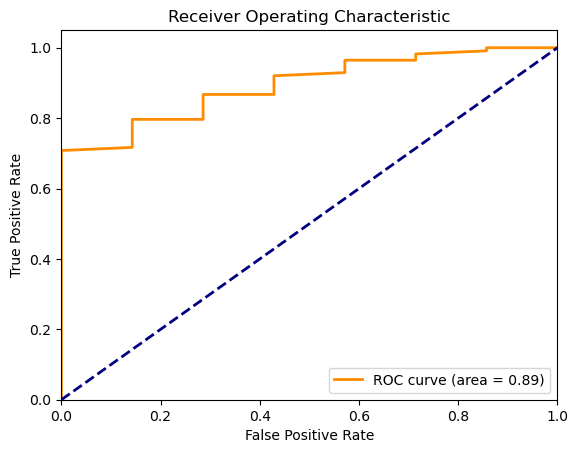

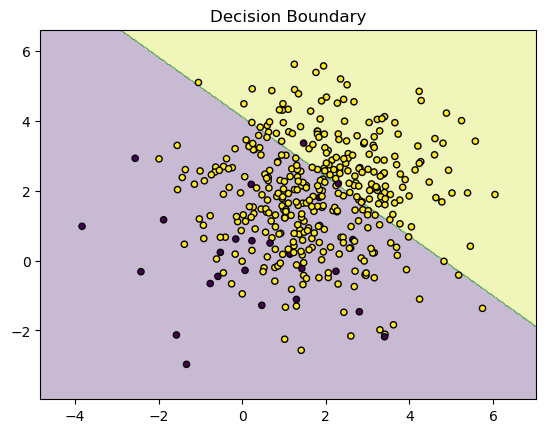

In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model with class weights
model = LogisticRegression(class_weight={0:50,1:1}, solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(X, y, model)



custom loss function

F:\Anaconda\Lib\site-packages\xgboost\core.py:774: UserWarning: [02:38:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "silent" } are not used.

  return func(**kwargs)


Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.57      0.27         7
           1       0.97      0.83      0.90       113

    accuracy                           0.82       120
   macro avg       0.57      0.70      0.58       120
weighted avg       0.92      0.82      0.86       120

ROC AUC Score: 0.7319848293299621


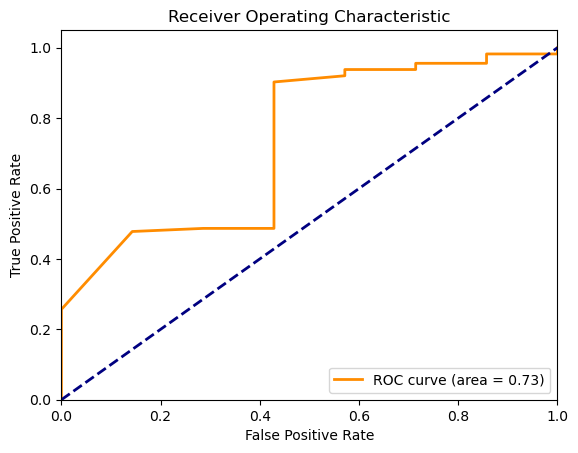

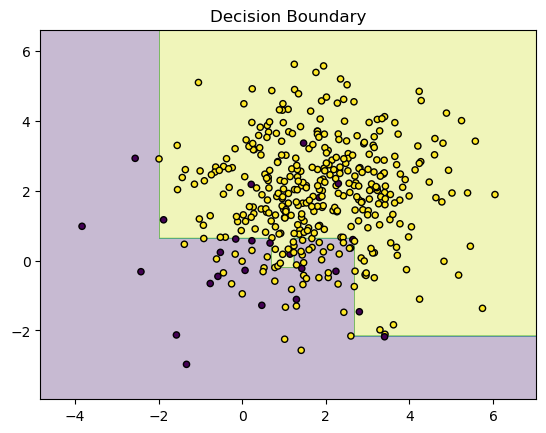

In [44]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# Generate imbalanced dataset
n_samples_1 = 25  # Number of samples in class 1
n_samples_2 = 375  # Number of samples in class 2
centers = [(0, 0), (2, 2)]  # Centers of each cluster
cluster_std = [1.5, 1.5]  # Standard deviation of each cluster

X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=cluster_std,
                  random_state=0)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def custom_loss(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))  # Convert to probability

    # Define penalties
    false_positive_penalty = 10
    false_negative_penalty = 1.0

    grad = (preds - labels) * ((labels == 1) * false_negative_penalty + (labels == 0) * false_positive_penalty)
    hess = preds * (1 - preds) * ((labels == 1) * false_negative_penalty + (labels == 0) * false_positive_penalty)
    return grad, hess

# Convert to DMatrix object
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'silent': 1,
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=10, obj=custom_loss)

# Predict test set
y_pred = np.where(bst.predict(dtest) > 0.5, 1, 0)
y_proba = bst.predict(dtest)  # Probability predictions

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print ROC AUC Score
auc_score = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", auc_score)

# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(xgb.DMatrix(np.c_[xx.ravel(), yy.ravel()]))
    Z = np.where(Z > 0.5, 1, 0).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(X, y, bst)
